# Link to The Github Repository for the Assignment:

https://github.com/Janvii01/Algerian_forest_files_assignment

#### IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import pickle


#### LOADING THE DATASET

In [2]:
# Loading the Algerian forest fires dataset
df=pd.read_csv(r"C:\Users\shuba\Downloads\Algerian_forest_fires_cleaned.csv")

#### EXPLORING THE DATASET

In [3]:
# Displaying basic information about the dataset
print("\nDataset Info:")
print("-----------------------------------------")
print(df.info())


Dataset Info:
-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB
None


In [4]:
# Displaying the first 20 rows of the dataset

print("First 20 Rows of the Dataset:")
df.head(20)

First 20 Rows of the Dataset:


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,0
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire,0
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire,0
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,0
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,0


In [5]:
# Display summary statistics of the dataset

print("\nSummary Statistics of the dataset:")
print("-----------------------------------------------")
df.describe()


Summary Statistics of the dataset:
-----------------------------------------------


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [6]:
# Check for missing values in the dataset

print("\nMissing Values:")
print("------------------------------------")
df.isnull().sum()


Missing Values:
------------------------------------


day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

## 1. DATA CLEANING AND PREPROCESSING

### Handling the errors effectively

In [7]:
# Checking unique classes in the dataset

print("Unique Classes in the Dataset:")
print(df['Classes'].unique())

Unique Classes in the Dataset:
['not fire   ' 'fire   ' 'fire' 'fire ' 'not fire' 'not fire '
 'not fire     ' 'not fire    ']


In [8]:
# Striping extra spaces from the 'Classes' column
df['Classes']=df['Classes'].str.strip()

# printing the unique values in the 'Classes' column
print(df['Classes'].unique())

['not fire' 'fire']


In [9]:
# Mapping 'Classes' to numerical values

# 'fire' is mapped to 1 and 'not fire' is mapped to 0
df['Classes'] = df['Classes'].map({'fire': 1, 'not fire': 0})

In [10]:
# Printing the unique values in the 'Classes' column after mapping

print("Unique Classes After Mapping:")
print(df['Classes'].unique())

Unique Classes After Mapping:
[0 1]


In [11]:
# printing the unique values in the 'Region' column
print(df['Region'].unique())

[0 1]


In [12]:
# Showing the count of occurrences for each unique value in the 'Region' column

print("Count of Regions in the Dataset:")
print(df['Region'].value_counts())


Count of Regions in the Dataset:
0    122
1    121
Name: Region, dtype: int64


In [13]:
# Displaying the first 5 rows of the dataset after mapping

print("First 5 Rows of the Dataset after mapping:")
df.head()

First 5 Rows of the Dataset after mapping:


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [14]:
# Display summary statistics of the dataset after mapping

print("\nSummary Statistics of the dataset after mapping:")
print("-----------------------------------------------")
df.describe()


Summary Statistics of the dataset after mapping:
-----------------------------------------------


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


#### CHECKING OUTLIERS

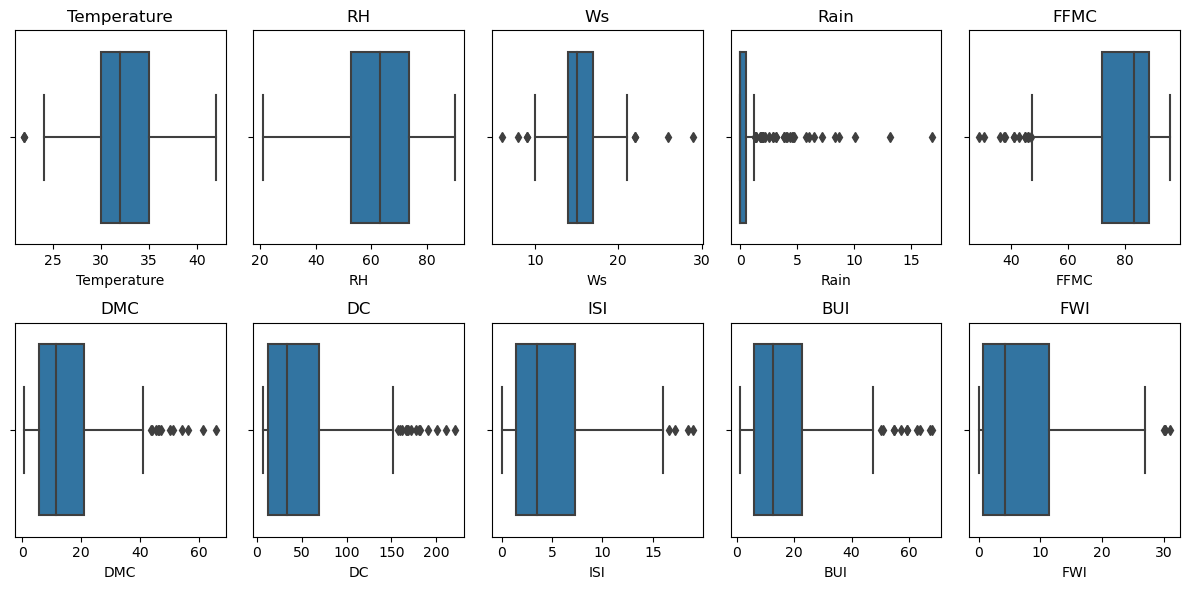

In [15]:
#Setting the size for the plot
plt.figure(figsize=(12, 6))

# Box plot for the given numerical features
numerical_features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

# Looping through each numerical feature to create box plots
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 5, i)     # Create a subplot for each feature
    sns.boxplot(x=df[feature])  #Creating box plot for feature
    plt.title(feature)    # Set the title for the plot

# Adjusting layout to prevent overlap
plt.tight_layout()
#Displaying result
plt.show()


#### CODE FOR HANDLING OUTLIERS

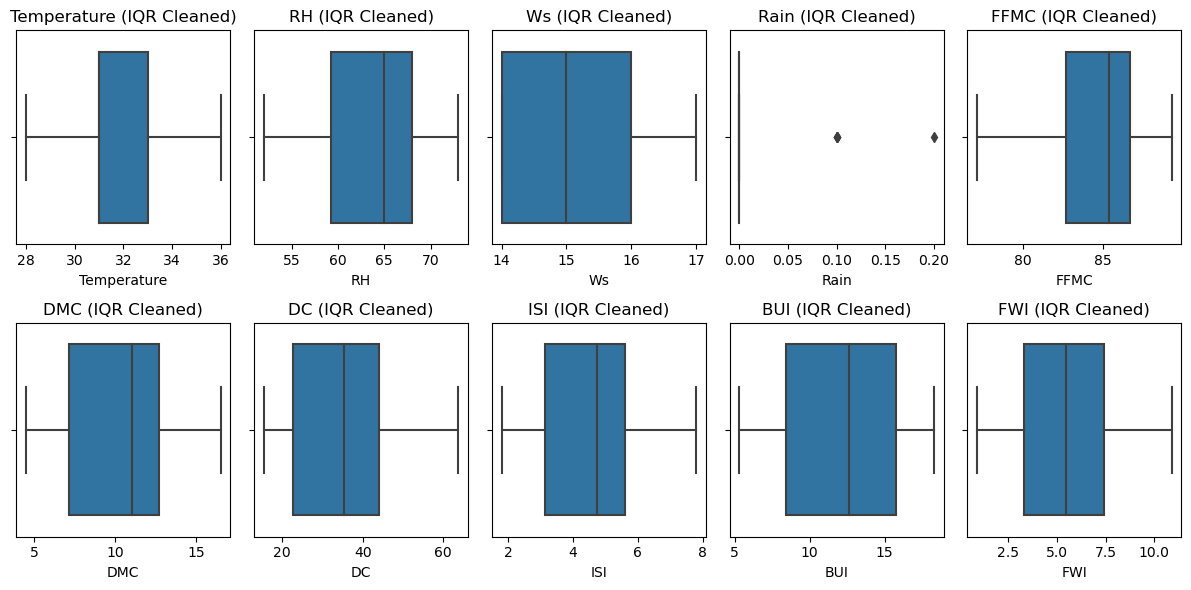

In [16]:
# List of numerical features 
numerical_features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

# Handling Outliers Using IQR Method
def handle_outliers_iqr(data):
    # Calculate the first and third quartiles
    Q1 = data.quantile(0.42)
    Q3 = data.quantile(0.58)
    IQR = Q3 - Q1
    # Keeping only those rows that are not outliers
    data_clean = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
    return data_clean


# Extracting the numerical features from the DataFrame
X = df[numerical_features] 

# Applying IQR Method
X_cleaned_iqr = handle_outliers_iqr(X)

# Box plot to visualize the numerical features after handling outliers with IQR
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(x=X_cleaned_iqr[feature])
    plt.title(f'{feature} (IQR Cleaned)')

plt.tight_layout()
plt.show()

In [17]:
# Display summary statistics of the dataset after handling outliers

print("\nSummary Statistics of the dataset after handlinh outliers:")
print("-----------------------------------------------")

df.describe()


Summary Statistics of the dataset after handlinh outliers:
-----------------------------------------------


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


### FEATURE SELECTION

In [18]:
# Calculate the correlation matrix for the DataFrame
correlation_matrix = df.corr() 

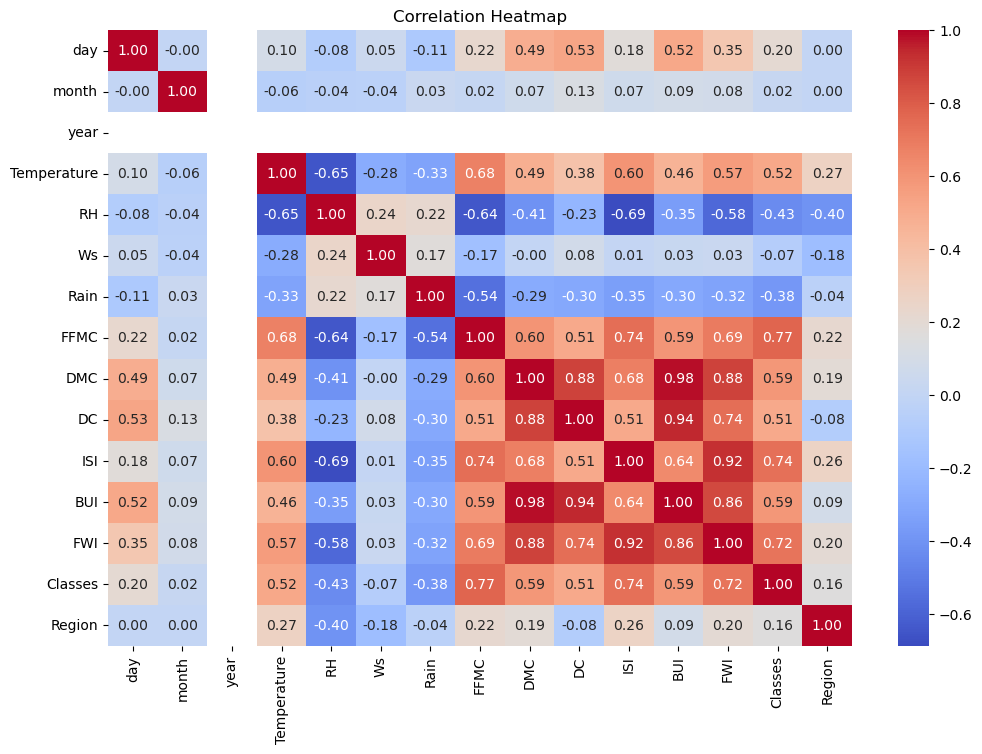

In [19]:
plt.figure(figsize=(12, 8))  
# Creating a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [20]:
# Defining features and target variable
x = df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI','FWI']]  
y = df['Classes']  # Target variable

## 2. DATA VISUALIZATION AND OBSERVATIONS

### EDA(EXPLORATORY DATA ANALYSIS)

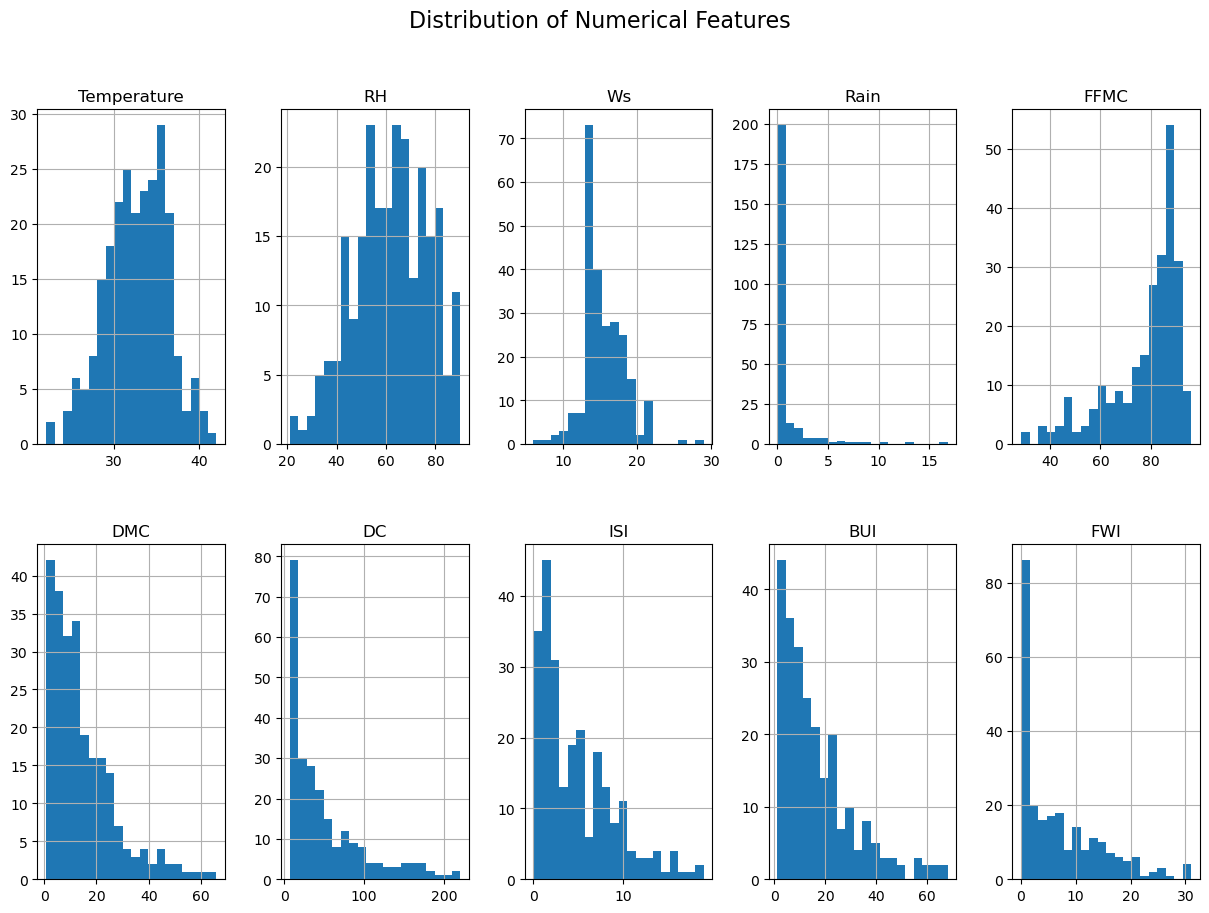

In [21]:
# Histograms for all the numerical features in the dataset
df[numerical_features].hist(bins=20, figsize=(15, 10), layout=(2, 5))
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()


Temperature:
From the distribution above, it may be observed that the distribution leans slightly to the left implying that frequencies of higher temperatures are more common in the dataset.
The majority of temperatures is rather close, fluctuating in the range of 30 to 40 Celsius scales.

RH (Relative Humidity):
This feature is fairly normally distributed but with slightly higher standard deviation to the right.
The majority of the RH values is from 40/ 80%.

Ws (Wind Speed):
Consequently, wind speed distributions can be considered positively skewed or right skewed.
A large number of cases have speeds less than or equal to 10 m/s, while the number of values increases only at higher wind speeds.

Rain:
This feature is positively skewed where most values are located at 0 mm, suggesting that there is very little rain within the study data.
Much less than a third of these events include rain exceeding 5 mm.

FFMC (Fine Fuel Moisture Code):
Extraordinary outliers are absent on the right side of the vertical axis, while on the left side most values are above 80 meaning that the forest is dry and prone to fire breakouts.

DMC (Duff Moisture Code):
This feature is skewed right, mean that the most of the instances have low values, less than 20, while several instances have high values.

DC (Drought Code):
Following the same pattern like DMC, distribution for DC is skewed right.
The majority floats between 0 and one hundred yet one finds some representations going up to two hundred.

ISI (Initial Spread Index):
The ISI also displays a positively skewed, and all observed values are below 10. This suggests that ordinary fire spread rates at initial stages in the dataset are relatively small.

BUI (Buildup Index):
As shown in DMC and DC, BUI is also positiv skewed.
Majority are located in the scale below 20 so majority are characterized by low integrated attributes of fire danger across the wash.

FWI (Fire Weather Index):
The FWI is calculated and illustrated in a frequency distribution where nearly all FWI values fall below ten. This means there are few occurrences of a fire weather that allows enhanced fire spread but they exist.

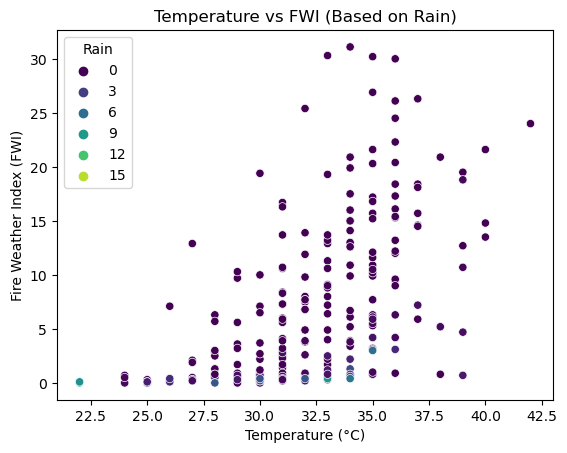

In [22]:
# Scatter plot between Temperature and FWI based on Rain
sns.scatterplot(x='Temperature', y='FWI', hue='Rain', data=df, palette='viridis')
plt.title('Temperature vs FWI (Based on Rain)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Fire Weather Index (FWI)')
plt.show()



From the analysis, it can be realized that as Temperature increases, the FWI values are also high which imply that temperature and FWI have a common relationship.
Fewer cases fall under the group with rainfall (colored), and the majority of the higher FWI values occur when rain is negligible (Rain = 0).
A little more scatter is observed for the lower values of FWI and the higher temperatures the corresponding higher values of FWI conditions are observed.
From the color distribution of the PPT, it appears to occur occasionally and its occurrences are more likely within the lower FWI range. 


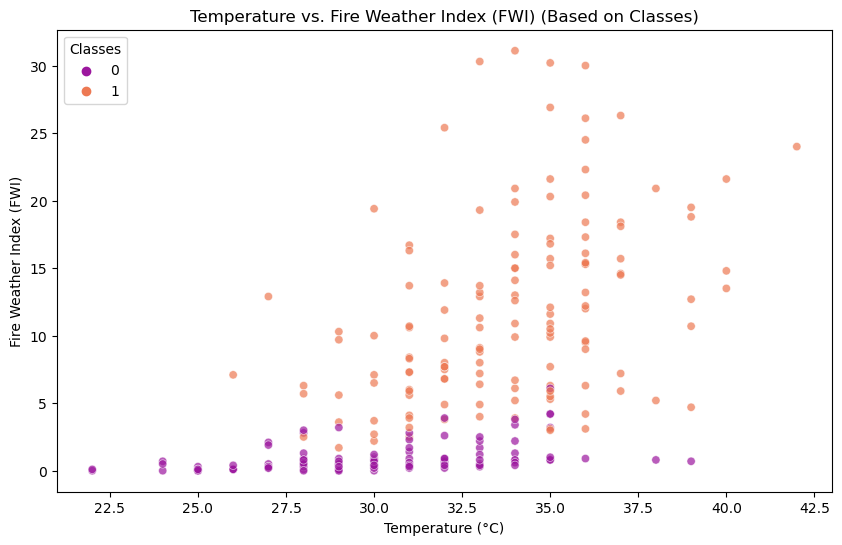

In [23]:
# Scatter plot between Temperature and FWI based on Classes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temperature', y='FWI', hue='Classes', palette='plasma', alpha=0.7)
plt.title('Temperature vs. Fire Weather Index (FWI) (Based on Classes)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Fire Weather Index (FWI)')
plt.legend(title='Classes', loc='upper left')
plt.show()


Higher temperatures generally correlate with higher FWI values, indicating increased fire risk.
Class ‘0’ (Purple) points are concentrated at lower FWI values, suggesting lower fire risk.
Class ‘1’ (Orange) points are spread across the FWI range, indicating varying levels of fire risk.

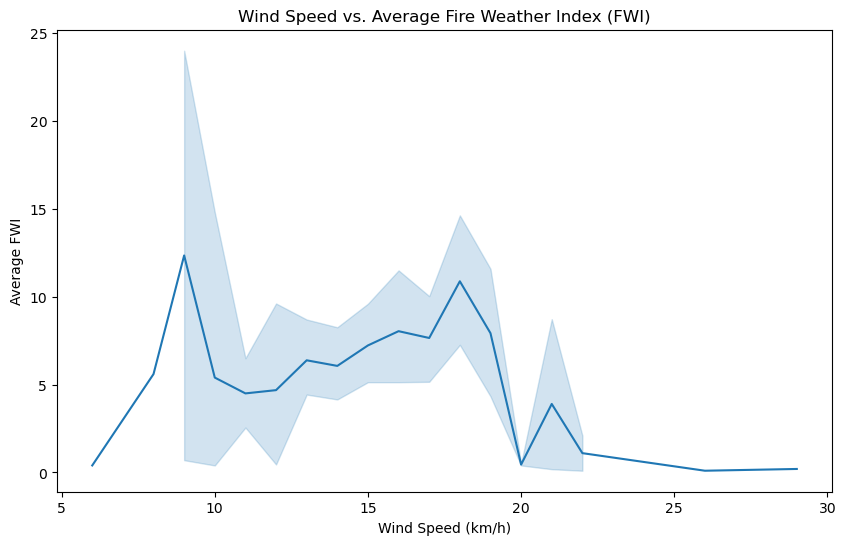

In [24]:
# Creating line plot with 'Ws' (Wind Speed) and 'FWI' (Fire Weather Index)

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Ws', y='FWI')
plt.title('Wind Speed vs. Average Fire Weather Index (FWI)')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Average FWI')
plt.show()


This graph is basically the comparison of the wind speed in kilometer per hour with average Fire Weather Index (FWI). 

General Trend: With greater values of wind speed, it may be noted that for most of the EWIF stations, FWI averages also tend to rise, which establishes the fact that there is a relationship between wind speed and FWI.

Peaks and Fluctuations: We are able to see higher averages of FWI at 5 and at right before 20 kph. As the wind speed increases beyond the maximum FWI of approximately 20 km/h, the average FWI decreases rather steeply.

Variability: The shaded blue area around the line means there is some scatter or uncertainty which shows that there is no direct linear relationship of wind speed with FWI.


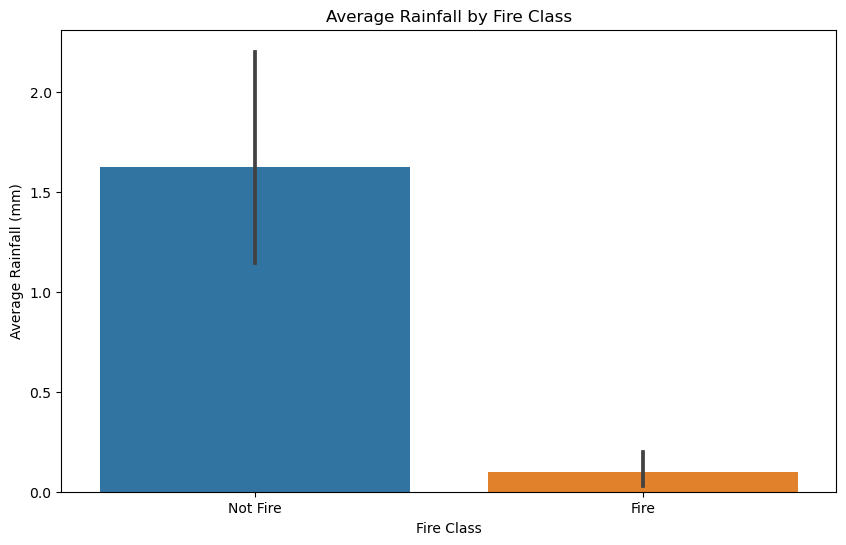

In [25]:
# Bar plot that shows average Rainfall by Fire Class

plt.figure(figsize=(10, 6))
# Create a bar plot to visualize the average rainfall by fire class
# Using 'estimator=np.mean' to calculate the average rainfall for each class
sns.barplot(data=df, x='Classes', y='Rain', estimator=np.mean)
# Set the title and labels for the plot
plt.title('Average Rainfall by Fire Class')
plt.xlabel('Fire Class')
plt.ylabel('Average Rainfall (mm)')
# Customize the x-ticks to show labels
plt.xticks(ticks=[0, 1], labels=['Not Fire', 'Fire'])
plt.show()


Higher Rainfall and Fire Incidence: One gets the impression that the likelihood of fires occurring is inversely proportional to the probability density of rainfall in areas or at certain times within a given country. On the other hand, lower mean rainfall a risk factor is associated with an increase in fire risk of occurrence.

Variability in Rainfall: The greater standard deviation in the “Not Fire” class is suggestive of the fact that while there is more rainfall under non-fire circumstances, the magnitude can be substantially more or lesser.

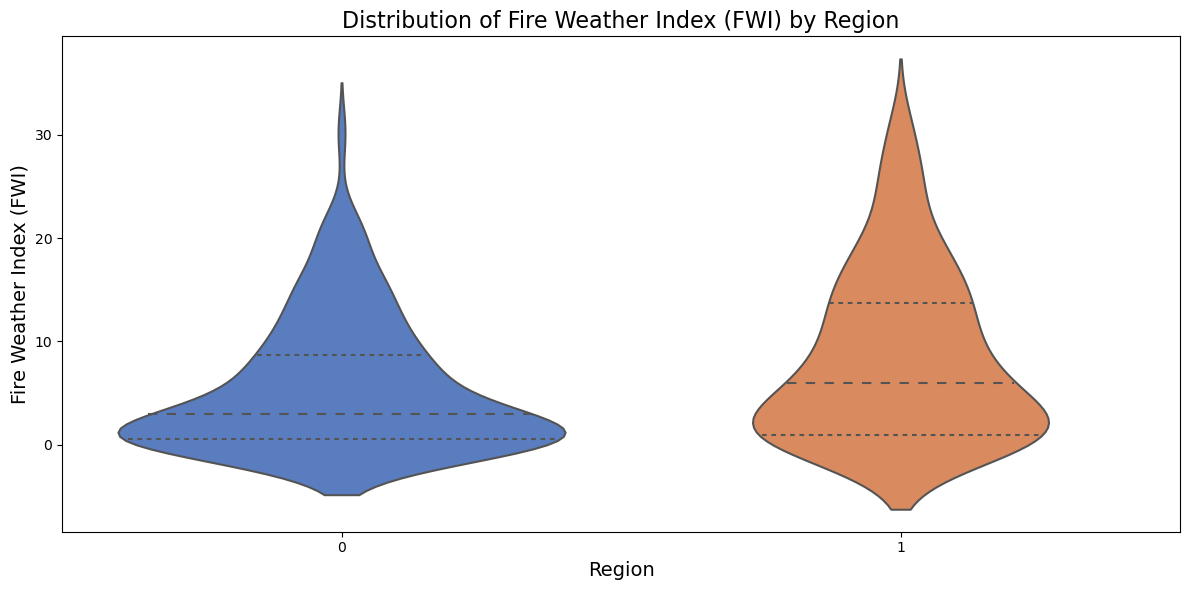

In [26]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a violin plot of FWI grouped by Region
sns.violinplot(x='Region', y='FWI', data=df, inner='quartile', palette='muted')

# Enhance the plot with title and labels
plt.title('Distribution of Fire Weather Index (FWI) by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Fire Weather Index (FWI)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


Fire Risk: Region 1 has a significantly higher and diverse fire potential than Region 0, which is characterized by frequent, but relatively low fire weather only.

Management Implications: These differences imply that fire management strategies may need to be considerably and diversely more effective in region one to tackle the higher and more frequent fire dangers.

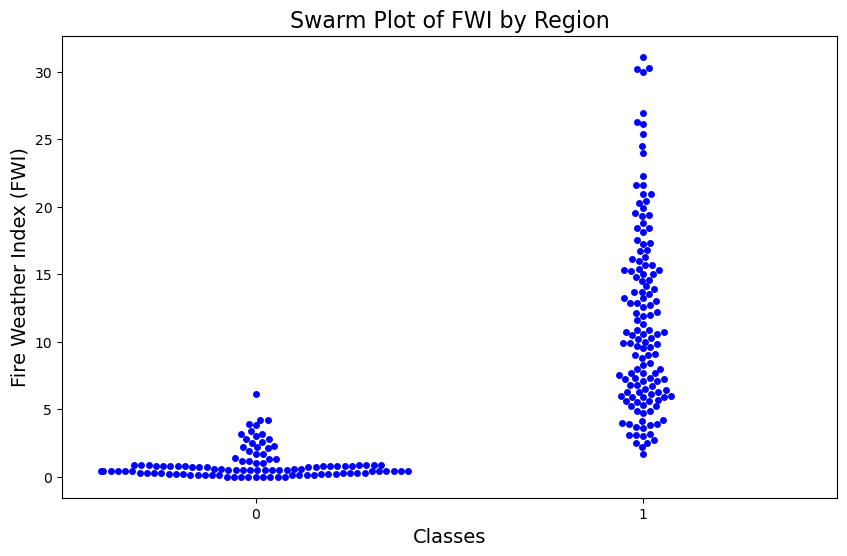

In [27]:
# Creating a swarm plot with 'Classes' and 'FWI' 

plt.figure(figsize=(10, 6))
sns.swarmplot(x='Classes', y='FWI', data=df, color='blue')
plt.title('Swarm Plot of FWI by Region', fontsize=16)
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Fire Weather Index (FWI)', fontsize=14)
plt.show()


Fire Risk: Class 1 has a higher and more varied fire risk compared to Class 0.

Management Strategies: Fire management efforts might need to be more intensive and varied in Class 1 to address the higher and more frequent fire risks.

## 3. MODEL DEVELOPMENT AND ANALYSIS

In [28]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [29]:
# Normalisation

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [30]:
# Save the StandardScaler model as a .pkl file
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("\nModel saved as 'scaler_file.pkl'")



Model saved as 'scaler_file.pkl'


### IMPLEMENTATION OF MULTIPLE LINEAR REGRESSION MODELS

In [31]:
# building the model

from sklearn.linear_model import LinearRegression 

In [32]:
lr=LinearRegression()

In [33]:
# train the model
lr.fit(x_train,y_train)

LinearRegression()

In [34]:
# predict the values

y_pred=lr.predict(x_test)

In [35]:
# Evaluate the model's performance

print("r2_score",r2_score(y_test,y_pred))
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score 0.66259729603301
mean_squared_error 0.08347238906971763
mean_absolute_error 0.24796311427950973
RMSE 0.2889158858036671


### Implementation of polynomial regression model

In [36]:
# Create polynomial features 
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Create a Linear Regression model for polynomial regression
poly_model = LinearRegression()

# Fit the model on the polynomial training data
poly_model.fit(x_train_poly, y_train)

# Predict on the polynomial test set
y_pred_poly = poly_model.predict(x_test_poly)


# Evaluate the model's performance
print("r2_score",r2_score(y_test,y_pred_poly))
print("mean_squared_error",mean_squared_error(y_test,y_pred_poly))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred_poly))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_poly)))

r2_score -1.2985744471410592
mean_squared_error 0.5686602339032858
mean_absolute_error 0.2925261454545203
RMSE 0.7540956397588344


In [37]:
# Save the polynomial regression model as a .pkl file
with open('poly_regression.pkl', 'wb') as poly_regression_file:
    pickle.dump(poly_model, poly_regression_file)

print("\nModel saved as 'poly_regression.pkl'")



Model saved as 'poly_regression.pkl'


In [38]:
# Save the polynomial regression features as a .pkl file
with open('poly_feature.pkl', 'wb') as poly_feature_file:
    pickle.dump(poly, poly_feature_file)

print("\nModel saved as 'poly_feature.pkl'")



Model saved as 'poly_feature.pkl'


### REGULARIZATION MODELS (RIDGE,LASSO AND ELASTIC NET)

In [39]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [40]:
ls=Lasso()
rd=Ridge()
en=ElasticNet()

In [41]:
# train the model with ridge
rd.fit(x_train,y_train)

# Print the coefficients and intercept of the model
print(rd.coef_, rd.intercept_)

# Make predictions on the training and test sets
y_pred_tr_rd=rd.predict(x_train)
y_pred_rd=rd.predict(x_test)

print()
print("----------------------------------------------------------------")
# Evaluate metrics on training data
print("Metrices on train_data")
print("r2_score",r2_score(y_train,y_pred_tr_rd))
print("mean_squared_error",mean_squared_error(y_train,y_pred_tr_rd))
print("mean_absolute_error",mean_absolute_error(y_train,y_pred_tr_rd))
print("RMSE",np.sqrt(mean_squared_error(y_train,y_pred_tr_rd)))
print()
print("----------------------------------------------------------------")
# Evaluate metrics on testing data
print("Metrices on test_data")
print("r2_score",r2_score(y_test,y_pred_rd))
print("mean_squared_error",mean_squared_error(y_test,y_pred_rd))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred_rd))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_rd)))

[-0.00311029  0.14362125 -0.02903077  0.04617061  0.32020174 -0.10303872
  0.03717467  0.14143965  0.00918448  0.16268801] 0.5670103092783505

----------------------------------------------------------------
Metrices on train_data
r2_score 0.7217203165899666
mean_squared_error 0.0683203388965009
mean_absolute_error 0.21158766715669847
RMSE 0.26138159632327

----------------------------------------------------------------
Metrices on test_data
r2_score 0.6544504866808347
mean_squared_error 0.085487884594579
mean_absolute_error 0.2523577427060557
RMSE 0.29238311270416933


In [42]:
# Save the trained Ridge model as a .pkl file
with open('ridge_model.pkl', 'wb') as ridge_model_file:
    pickle.dump(rd, ridge_model_file)

print("\nModel saved as 'ridge_model.pkl'")



Model saved as 'ridge_model.pkl'


In [43]:
# train the ls model
ls.fit(x_train,y_train)

# Print the coefficients and intercept of the model
print(ls.coef_, ls.intercept_)

# Make predictions on the training and test sets
y_pred_tr_ls=ls.predict(x_train)
y_pred_ls=ls.predict(x_test)

print()
print("----------------------------------------------------------------")
# Evaluate metrics on training data
print("Metrices on train_data")
print("r2_score",r2_score(y_train,y_pred_tr_ls))
print("mean_squared_error",mean_squared_error(y_train,y_pred_tr_ls))
print("mean_absolute_error",mean_absolute_error(y_train,y_pred_tr_ls))
print("RMSE",np.sqrt(mean_squared_error(y_train,y_pred_tr_ls)))
print()
print("----------------------------------------------------------------")
# Evaluate metrics on testing data
print("Metrices on test_data")
print("r2_score",r2_score(y_test,y_pred_ls))
print("mean_squared_error",mean_squared_error(y_test,y_pred_ls))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred_ls))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_ls)))

[ 0. -0. -0. -0.  0.  0.  0.  0.  0.  0.] 0.5670103092783505

----------------------------------------------------------------
Metrices on train_data
r2_score 0.0
mean_squared_error 0.24550961845041983
mean_absolute_error 0.49101923690083965
RMSE 0.4954892717813574

----------------------------------------------------------------
Metrices on test_data
r2_score -0.0010334685645558839
mean_squared_error 0.24765259488852404
mean_absolute_error 0.49316221333894383
RMSE 0.4976470585550808


In [44]:
# Save the trained Lasso model as a .pkl file
with open('lasso_model.pkl', 'wb') as lasso_model_file:
    pickle.dump(ls, lasso_model_file)

print("\nModel saved as 'lasso_model.pkl'")



Model saved as 'lasso_model.pkl'


In [45]:
# train the lr model
lr.fit(x_train,y_train)

# Print the coefficients and intercept of the model
print(lr.coef_, lr.intercept_)

# Make predictions on the training and test sets
y_pred_tr_lr=lr.predict(x_train)
y_pred_lr=lr.predict(x_test)

print()
print("----------------------------------------------------------------")
# Evaluate metrics on training data
print("Metrices on train_data")
print("r2_score",r2_score(y_train,y_pred_tr_lr))
print("mean_squared_error",mean_squared_error(y_train,y_pred_tr_lr))
print("mean_absolute_error",mean_absolute_error(y_train,y_pred_tr_lr))
print("RMSE",np.sqrt(mean_squared_error(y_train,y_pred_tr_lr)))
print()
print("----------------------------------------------------------------")
# Evaluate metrics on testing data
print("Metrices on test_data")
print("r2_score",r2_score(y_test,y_pred_lr))
print("mean_squared_error",mean_squared_error(y_test,y_pred_lr))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred_lr))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_lr)))

[-0.00375435  0.14709419 -0.03010242  0.0476795   0.32530307 -0.25441845
 -0.03727244  0.13329918  0.21687629  0.18116792] 0.5670103092783505

----------------------------------------------------------------
Metrices on train_data
r2_score 0.7221156244469844
mean_squared_error 0.06822328701535402
mean_absolute_error 0.21052012063387804
RMSE 0.2611958786339364

----------------------------------------------------------------
Metrices on test_data
r2_score 0.66259729603301
mean_squared_error 0.08347238906971763
mean_absolute_error 0.24796311427950973
RMSE 0.2889158858036671


In [46]:
# Save the trained Linear Regression model as a .pkl file
with open('linear_regression_model.pkl', 'wb') as linear_regression_model_file:
    pickle.dump(lr, linear_regression_model_file)

print("\nModel saved as 'linear_regression_model.pkl'")



Model saved as 'linear_regression_model.pkl'


In [47]:
# train the en model
en.fit(x_train,y_train)

print(en.coef_, en.intercept_)
y_pred_tr_en=en.predict(x_train)
y_pred_en=en.predict(x_test)

print()
print("----------------------------------------------------------------")
print("Metrices on train_data")
print("r2_score",r2_score(y_train,y_pred_tr_en))
print("mean_squared_error",mean_squared_error(y_train,y_pred_tr_en))
print("mean_absolute_error",mean_absolute_error(y_train,y_pred_tr_en))
print("RMSE",np.sqrt(mean_squared_error(y_train,y_pred_tr_en)))
print()
print("----------------------------------------------------------------")
print("Metrices on test_data")
print("r2_score",r2_score(y_test,y_pred_en))
print("mean_squared_error",mean_squared_error(y_test,y_pred_en))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred_en))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_en)))

[ 0. -0. -0. -0.  0.  0.  0.  0.  0.  0.] 0.5670103092783505

----------------------------------------------------------------
Metrices on train_data
r2_score 0.0
mean_squared_error 0.24550961845041983
mean_absolute_error 0.49101923690083965
RMSE 0.4954892717813574

----------------------------------------------------------------
Metrices on test_data
r2_score -0.0010334685645558839
mean_squared_error 0.24765259488852404
mean_absolute_error 0.49316221333894383
RMSE 0.4976470585550808


In [48]:
# Save the trained ElasticNet model as a .pkl file
with open('elasticnet_model.pkl', 'wb') as elasticnet_model_file:
    pickle.dump(en, elasticnet_model_file)

print("\nModel saved as 'elasticnet_model.pkl'")



Model saved as 'elasticnet_model.pkl'


### EFFECTIVE USE OF CROSS-VALIDATION AND HYPERPARAMETER TUNING

In [49]:
#  Cross-Validation for ridge

cv_scores = cross_val_score(rd, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validation MSE: {-cv_scores.mean()}')

# Fit the model on the training data
rd.fit(x_train, y_train)

# Predictions on the test set
y_pred = rd.predict(x_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test MSE: {mse}')
print(f'Test r2_score: {r2}')



Cross-Validation MSE: 0.07697096085958918
Test MSE: 0.085487884594579
Test r2_score: 0.6544504866808347


In [50]:
# Save the trained Cross-validation as a .pkl file
with open('cross_validation_model_ridge.pkl', 'wb') as ridge_CV_model_file:
    pickle.dump(rd, ridge_CV_model_file)

print("\nModel saved as 'ridge_CV_model.pkl'")



Model saved as 'ridge_CV_model.pkl'


In [51]:
#Cross-Validation for lasso

cv_scores = cross_val_score(ls, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validation MSE: {-cv_scores.mean()}')

# Fit the model on the training data
ls.fit(x_train, y_train)

# Predictions on the test set
y_pred = ls.predict(x_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test MSE: {mse}')
print(f'Test r2_score: {r2}')



Cross-Validation MSE: 0.2488174305006215
Test MSE: 0.24765259488852404
Test r2_score: -0.0010334685645558839


In [52]:
# Save the trained Cross-validation as a .pkl file
with open('cross_validation_model_lasso.pkl', 'wb') as lasso_CV_model_file:
    pickle.dump(ls, lasso_CV_model_file)

print("\nModel saved as 'lasso_CV_model.pkl'")



Model saved as 'lasso_CV_model.pkl'


In [53]:
#  Cross-Validation for elastic net

cv_scores = cross_val_score(en, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validation MSE: {-cv_scores.mean()}')

# Fit the model on the training data
en.fit(x_train, y_train)

# Predictions on the test set
y_pred = en.predict(x_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test MSE: {mse}')
print(f'Test r2_score: {r2}')



Cross-Validation MSE: 0.2488174305006215
Test MSE: 0.24765259488852404
Test r2_score: -0.0010334685645558839


In [54]:
# Save the trained Cross-validation as a .pkl file
with open('cross_validation_model_elasticnet.pkl', 'wb') as elasticnet_CV_model_file:
    pickle.dump(en, elasticnet_CV_model_file)

print("\nModel saved as 'elasticnet_CV_model.pkl'")



Model saved as 'elasticnet_CV_model.pkl'


In [55]:
param_grid_rd = {
    'alpha': [0.1, 1.0, 10.0, 100.0],  # Regularization strength
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga'], # Different solvers
}
# Set up the grid search
grid_search = GridSearchCV(rd, param_grid_rd, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)

# Optimal parameters and score
print(f'Optimal Parameters: {grid_search.best_params_}')
print(f'Optimal Cross-Validation MSE: {-grid_search.best_score_}')

# Predictions using the optimal model
optimal_model = grid_search.best_estimator_
y_pred_optimal = optimal_model.predict(x_test)

# Evaluation metrics for the optimal model
mse_optimal = mean_squared_error(y_test, y_pred_optimal)
r2_optimal = r2_score(y_test, y_pred_optimal)
print(f'Test MSE (Optimal Model): {mse_optimal}')
print(f'Test r2_score (Optimal Model): {r2_optimal}')


C:\Users\shuba\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\shuba\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\shuba\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\shuba\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\shuba\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\shuba\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

Optimal Parameters: {'alpha': 1.0, 'fit_intercept': True, 'solver': 'saga'}
Optimal Cross-Validation MSE: 0.07694781585154843
Test MSE (Optimal Model): 0.08554166187641987
Test r2_score (Optimal Model): 0.6542331141998584


In [56]:
# Save the trained hyperparameter tuned ridge model as a .pkl file
with open('hyperparameter_tuned_ridge.pkl', 'wb') as ridge_ht_model_file:
    pickle.dump(rd, ridge_ht_model_file)

print("\nModel saved as 'ridge_ht_model.pkl'")



Model saved as 'ridge_ht_model.pkl'


In [57]:
param_grid_ls = {
    'alpha': [0.1, 1.0, 10.0, 100.0],  # Regularization strength
    'fit_intercept': [True, False],
}

# Set up the grid search
grid_search = GridSearchCV(ls, param_grid_ls, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)

# Optimal parameters and score
print(f'Optimal Parameters: {grid_search.best_params_}')
print(f'Optimal Cross-Validation MSE: {-grid_search.best_score_}')

# Predictions using the optimal model
optimal_model = grid_search.best_estimator_
y_pred_optimal = optimal_model.predict(x_test)

# Evaluation metrics for the optimal model
mse_optimal = mean_squared_error(y_test, y_pred_optimal)
r2_optimal = r2_score(y_test, y_pred_optimal)
print(f'Test MSE (Optimal Model): {mse_optimal}')
print(f'Test r2_score (Optimal Model): {r2_optimal}')


Optimal Parameters: {'alpha': 0.1, 'fit_intercept': True}
Optimal Cross-Validation MSE: 0.0935580289498376
Test MSE (Optimal Model): 0.11178305841667459
Test r2_score (Optimal Model): 0.5481630921575158


In [58]:
# Save the trained hyperparameter tuned lasso model as a .pkl file
with open('hyperparameter_tuned_lasso.pkl', 'wb') as lasso_ht_model_file:
    pickle.dump(ls, lasso_ht_model_file)

print("\nModel saved as 'lasso_ht_model.pkl'")



Model saved as 'lasso_ht_model.pkl'


In [59]:
# Define the parameter grid for elastic net
param_grid_en= {
    'alpha': [0.1, 1.0, 10.0, 100.0],  # Regularization strength
    'l1_ratio': [0.1, 0.5, 0.9],       # Mix of L1 and L2
    'fit_intercept': [True, False],
}

# Set up the grid search
grid_search = GridSearchCV(en, param_grid_en, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)

# Optimal parameters and score
print(f'Optimal Parameters: {grid_search.best_params_}')
print(f'Optimal Cross-Validation MSE: {-grid_search.best_score_}')

# Predictions using the optimal model
optimal_model = grid_search.best_estimator_
y_pred_optimal = optimal_model.predict(x_test)

# Evaluation metrics for the optimal model
mse_optimal = mean_squared_error(y_test, y_pred_optimal)
r2_optimal = r2_score(y_test, y_pred_optimal)
print(f'Test MSE (Optimal Model): {mse_optimal}')
print(f'Test r2_score (Optimal Model): {r2_optimal}')


Optimal Parameters: {'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.1}
Optimal Cross-Validation MSE: 0.08021936763808944
Test MSE (Optimal Model): 0.09613118732083031
Test r2_score (Optimal Model): 0.6114293253243879


In [60]:
# Save the trained hyperparameter tuned elasticnet model as a .pkl file
with open('hyperparameter_tuned_elasticnet.pkl', 'wb') as elasticnet_ht_model_file:
    pickle.dump(en, elasticnet_ht_model_file)

print("\nModel saved as 'elasticnet_ht_model.pkl'")



Model saved as 'elasticnet_ht_model.pkl'


## 4. TESTING THE MODEL ON UNSEEN DATA AND PROVIDING A THROUGH ANALYSIS OF RESULTS

In [61]:
import pickle

sc=pickle.load(open('scaler.pkl','rb'))
poly_model=pickle.load(open('poly_regression.pkl','rb'))
poly=pickle.load(open('poly_feature.pkl','rb'))
ridge=pickle.load(open('ridge_model.pkl','rb'))
lasso=pickle.load(open('lasso_model.pkl','rb'))
lr=pickle.load(open('linear_regression_model.pkl','rb'))
en=pickle.load(open('elasticnet_model.pkl','rb'))
ridge_CV=pickle.load(open('cross_validation_model_ridge.pkl','rb'))
lasso_CV=pickle.load(open('cross_validation_model_lasso.pkl','rb'))
elasticnet_CV=pickle.load(open('cross_validation_model_elasticnet.pkl','rb'))
ridge_ht=pickle.load(open('hyperparameter_tuned_ridge.pkl','rb'))
lasso_ht=pickle.load(open('hyperparameter_tuned_lasso.pkl','rb'))
elasticnet_ht=pickle.load(open('hyperparameter_tuned_elasticnet.pkl','rb'))

In [62]:
unknown_data={
    'Temperature':[22.5,25,29,31.5,33,36.5,38,23.6,27,30.8],
    'RH':[22,25,67,87,45,69,49,33,38.5,43],
    'Ws':[21,7,10,11.5,23,28,13,15.5,14,19],
    'Rain':[1,4,7,9,10,14.5,2.4,13,11,9.5],
    'FFMC':[33,39,47,59,30.7,90,85,81.2,70,65],
    'DMC':[4,50,49,34,28,61.5,30.4,55.8,40,10],
    'DC':[10,100,200.4,99.5,199,151,167,143,177,189],
    'ISI':[5,8,18,14.4,1.4,17,2.5,10,11,15],
    'BUI':[60,55.4,13,23.5,5,43,67,19,57,21],
    'FWI':[2.5,24,6,9,11.3,30,29,23,17,20.7]
}

In [63]:
import pandas as pd


In [64]:
# Converting the dictionary into a DataFrame
df = pd.DataFrame(unknown_data)

# Displaying the DataFrame
print(df)

   Temperature    RH    Ws  Rain  FFMC   DMC     DC   ISI   BUI   FWI
0         22.5  22.0  21.0   1.0  33.0   4.0   10.0   5.0  60.0   2.5
1         25.0  25.0   7.0   4.0  39.0  50.0  100.0   8.0  55.4  24.0
2         29.0  67.0  10.0   7.0  47.0  49.0  200.4  18.0  13.0   6.0
3         31.5  87.0  11.5   9.0  59.0  34.0   99.5  14.4  23.5   9.0
4         33.0  45.0  23.0  10.0  30.7  28.0  199.0   1.4   5.0  11.3
5         36.5  69.0  28.0  14.5  90.0  61.5  151.0  17.0  43.0  30.0
6         38.0  49.0  13.0   2.4  85.0  30.4  167.0   2.5  67.0  29.0
7         23.6  33.0  15.5  13.0  81.2  55.8  143.0  10.0  19.0  23.0
8         27.0  38.5  14.0  11.0  70.0  40.0  177.0  11.0  57.0  17.0
9         30.8  43.0  19.0   9.5  65.0  10.0  189.0  15.0  21.0  20.7


In [65]:
import numpy as np

# Initialize a dictionary to store model predictions
model_predictions = {}

# List of loaded models
models = {
    'Polynomial Regression': poly_model,
    'Ridge Regression': ridge,
    'Lasso Regression': lasso,
    'Linear Regression': lr,
    'ElasticNet': en,
    'Ridge CV': ridge_CV,
    'Lasso CV': lasso_CV,
    'ElasticNet CV': elasticnet_CV,
    'Hyperparameter Tuned Ridge': ridge_ht,
    'Hyperparameter Tuned Lasso': lasso_ht,
    'Hyperparameter Tuned ElasticNet': elasticnet_ht,
}

# Scale the data using the loaded scaler
scaled_data = sc.transform(df)


# Iterate over each model and make predictions
for model_name, model in models.items():
    try:
        if model_name == 'Polynomial Regression':
            # Transform the scaled data with PolynomialFeatures
            scaled_data_poly = poly.transform(scaled_data)  # Apply polynomial feature transformation
            predictions = model.predict(scaled_data_poly)   # Make predictions with the transformed data
        else:
            predictions = model.predict(scaled_data)  # Make predictions on the scaled data
        model_predictions[model_name] = predictions
        print(f"Predictions from {model_name}: {predictions}")
    except Exception as e:
        print(f"Error with model {model_name}: {e}")

# Convert the predictions into a DataFrame
predictions_df = pd.DataFrame(model_predictions)

# Display the predictions DataFrame
print(predictions_df)


Predictions from Polynomial Regression: [-176.680038     29.22479294   55.26174997    0.41183951   18.96689372
  -17.23714253   44.00529477  -68.34306087  -10.15360961    0.52844281]
Predictions from Ridge Regression: [-0.90332519 -0.27072192  0.3518243   0.83625134 -0.58270556  1.66105273
  1.02843872  0.88085614  0.72894566  0.99865414]
Predictions from Lasso Regression: [0.56701031 0.56701031 0.56701031 0.56701031 0.56701031 0.56701031
 0.56701031 0.56701031 0.56701031 0.56701031]
Predictions from Linear Regression: [-0.16068037 -0.20385495 -0.35383171  0.62359083 -1.12419662  1.37010747
  1.42112671  0.3279549   0.81272697  0.91203283]
Predictions from ElasticNet: [0.56701031 0.56701031 0.56701031 0.56701031 0.56701031 0.56701031
 0.56701031 0.56701031 0.56701031 0.56701031]
Predictions from Ridge CV: [-0.90332519 -0.27072192  0.3518243   0.83625134 -0.58270556  1.66105273
  1.02843872  0.88085614  0.72894566  0.99865414]
Predictions from Lasso CV: [0.56701031 0.56701031 0.56701031